In [1]:
import numpy as np
import nglview
import matplotlib
import matplotlib.pyplot as plt
import mdtraj as md
from soursop.sstrajectory import SSTrajectory
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [170]:
t=SSTrajectory('../../polyS/prod3/polyS_s3_0-500ns.dcd', '../../polyS/prod1/polyS_wb_150mMNaCl.psf')
protein = t.proteinTrajectoryList[0]
protein_frames_contact_map=protein.get_contact_map()

In [171]:
data=np.array(protein_frames_contact_map[0])

data.shape[1]

21

In [172]:
from matplotlib.colors import LinearSegmentedColormap
def plot_contact_map(contact_map ,t):
    fig=plt.figure(figsize=(6,5), dpi=720)
    ax=fig.add_subplot(111)
    colors = ['white', "blue", "red"]
    cmap = LinearSegmentedColormap.from_list("white_blue_red", colors)
    title=t[:-7]
    ax.set_title(title, weight='bold', fontsize=20,loc='left')
    ax.set_xlabel('Residue $i$', weight='bold', fontsize=20)
    ax.set_ylabel('Residue $j$', weight='bold', fontsize=20)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    im=ax.imshow(protein_frames_contact_map[0],cmap=cmap)
    ax.set_xticks(np.arange(0, data.shape[1]+1, 2))
    ax.set_xticklabels(np.arange(1, data.shape[1] + 1, 2), weight='bold', fontsize=10, rotation=0)

    ax.set_yticks(np.arange(0, data.shape[0], 2))
    ax.set_yticklabels(np.arange(1, data.shape[0] + 1, 2), weight='bold', fontsize=10, rotation=0)

    plt.xticks(weight='bold', fontsize=20)
    plt.yticks(weight='bold', fontsize=20)
    ax1=plt.gca()
    
    

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)   
    colorbar=fig.colorbar(im, cax=cax)
    colorbar.set_label('Frequency', rotation=90, labelpad=3, weight='bold', fontsize=18)
    ticks = colorbar.get_ticks()  # Get the current colorbar ticks
    max_tick_value = ticks[-1]  # Get the maximum tick value
    new_ticks = [tick for tick in ticks if tick < max_tick_value][::1]  # Select every other tick
    colorbar.set_ticks(new_ticks)

    for t in colorbar.ax.get_yticklabels():
        t.set_fontsize(20)
        t.set_fontweight('bold')
    
    plt.xticks(weight='bold', fontsize=20)
    plt.yticks(weight='bold', fontsize=20)
    
    #divider = make_axes_locatable(ax1)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
   
    #plt.colorbar(im, cax=cax, label='Frequency')
    #plt.colorbar.tickslabel('Frequency', rotation=90, labelpad=30, weight='bold', fontsize=18)
    plt.tight_layout()
    plt.savefig('PS-r3-CM.png', format='png')
    plt.show()

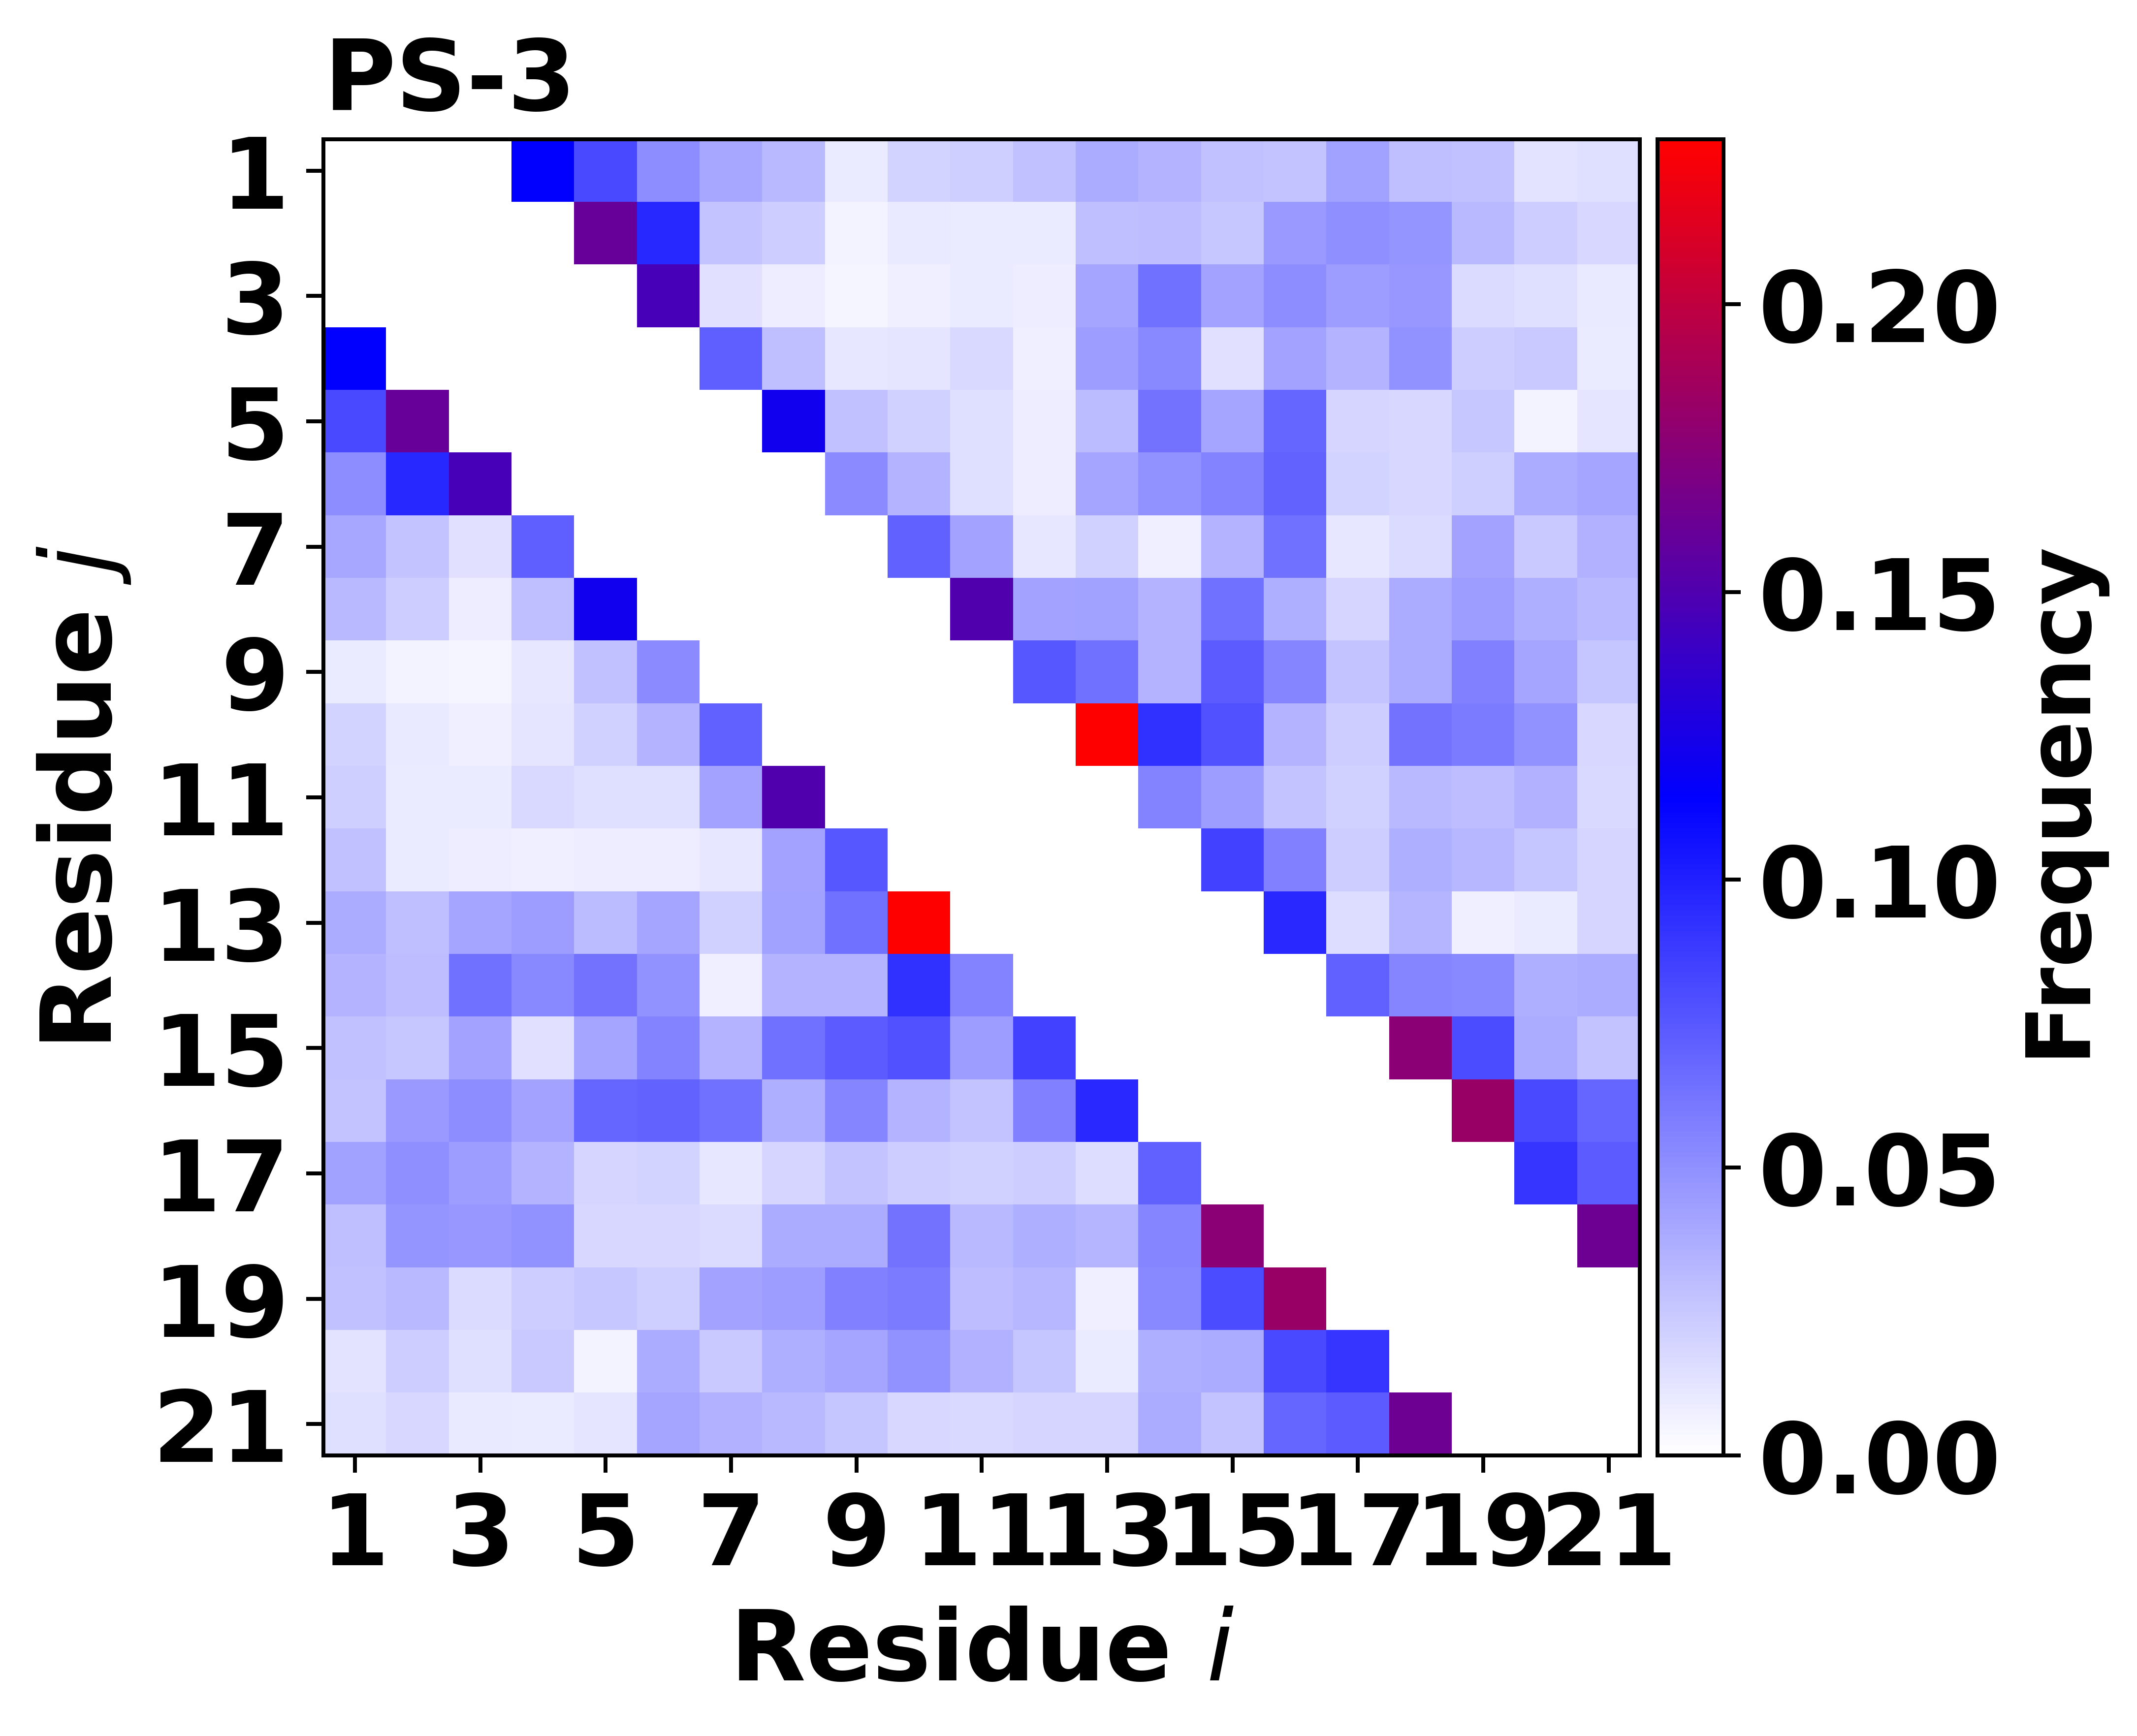

In [173]:
t='PS-3-CM.png'
plot_contact_map(protein_frames_contact_map[0],t)

In [174]:
def plot_asphericity_vs_Rg(radius_of_gyration, asphericity, t, num_bins=100, max_Rg=50, max_asphericity=1.0):
    fig=plt.figure(figsize=(6,5), dpi=720)
    ax=fig.add_subplot(111)
    colors = ['white', "blue", "red"]
    cmap = LinearSegmentedColormap.from_list("white_blue_red", colors)
    title=t[:-7]
    ax.set_title(title, weight='bold', fontsize=20,loc='left')
    ax.set_xlabel('$R_g$', weight='bold', fontsize=20)
    ax.set_ylabel('Asphericity ($\delta$)', weight='bold', fontsize=20)
    xedges=np.linspace(0, max_Rg, num_bins+1)
    yedges=np.linspace(0,max_asphericity, num_bins+1)
    Rg=radius_of_gyration
    asp=asphericity
    _hist, _xedges, _yedges, im = ax.hist2d(Rg, asp, bins=(xedges, yedges), cmap=cmap)
    plt.xticks(weight='bold', fontsize=20)
    plt.yticks(weight='bold', fontsize=20)
    ax1=plt.gca()
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)   
    colorbar=fig.colorbar(im, cax=cax)
    colorbar.set_label('Count', rotation=90, labelpad=1, weight='bold', fontsize=18)
    ticks = colorbar.get_ticks()  # Get the current colorbar ticks
    max_tick_value = ticks[-1]  # Get the maximum tick value
    new_ticks = [tick for tick in ticks if tick < max_tick_value][::2]  # Select every other tick
    colorbar.set_ticks(new_ticks)
    for t in colorbar.ax.get_yticklabels():
        t.set_fontsize(20)
        t.set_fontweight('bold')
    plt.xticks(weight='bold', fontsize=18)
    plt.yticks(weight='bold', fontsize=18)
    plt.tight_layout()
    plt.savefig('RgVsAsp_PS-r3.png', format='png')
    plt.show()
    
    plt.close()

In [175]:
start_residue=0
end_residue = protein.n_residues - 1
asphericity = protein.get_asphericity(start_residue, end_residue)
radius_of_gyration=protein.get_radius_of_gyration(start_residue, end_residue)



STATUS: On frame 500 of 25000 [computing gyration tensor]
STATUS: On frame 1000 of 25000 [computing gyration tensor]
STATUS: On frame 1500 of 25000 [computing gyration tensor]
STATUS: On frame 2000 of 25000 [computing gyration tensor]
STATUS: On frame 2500 of 25000 [computing gyration tensor]
STATUS: On frame 3000 of 25000 [computing gyration tensor]
STATUS: On frame 3500 of 25000 [computing gyration tensor]
STATUS: On frame 4000 of 25000 [computing gyration tensor]
STATUS: On frame 4500 of 25000 [computing gyration tensor]
STATUS: On frame 5000 of 25000 [computing gyration tensor]
STATUS: On frame 5500 of 25000 [computing gyration tensor]
STATUS: On frame 6000 of 25000 [computing gyration tensor]
STATUS: On frame 6500 of 25000 [computing gyration tensor]
STATUS: On frame 7000 of 25000 [computing gyration tensor]
STATUS: On frame 7500 of 25000 [computing gyration tensor]
STATUS: On frame 8000 of 25000 [computing gyration tensor]
STATUS: On frame 8500 of 25000 [computing gyration tensor

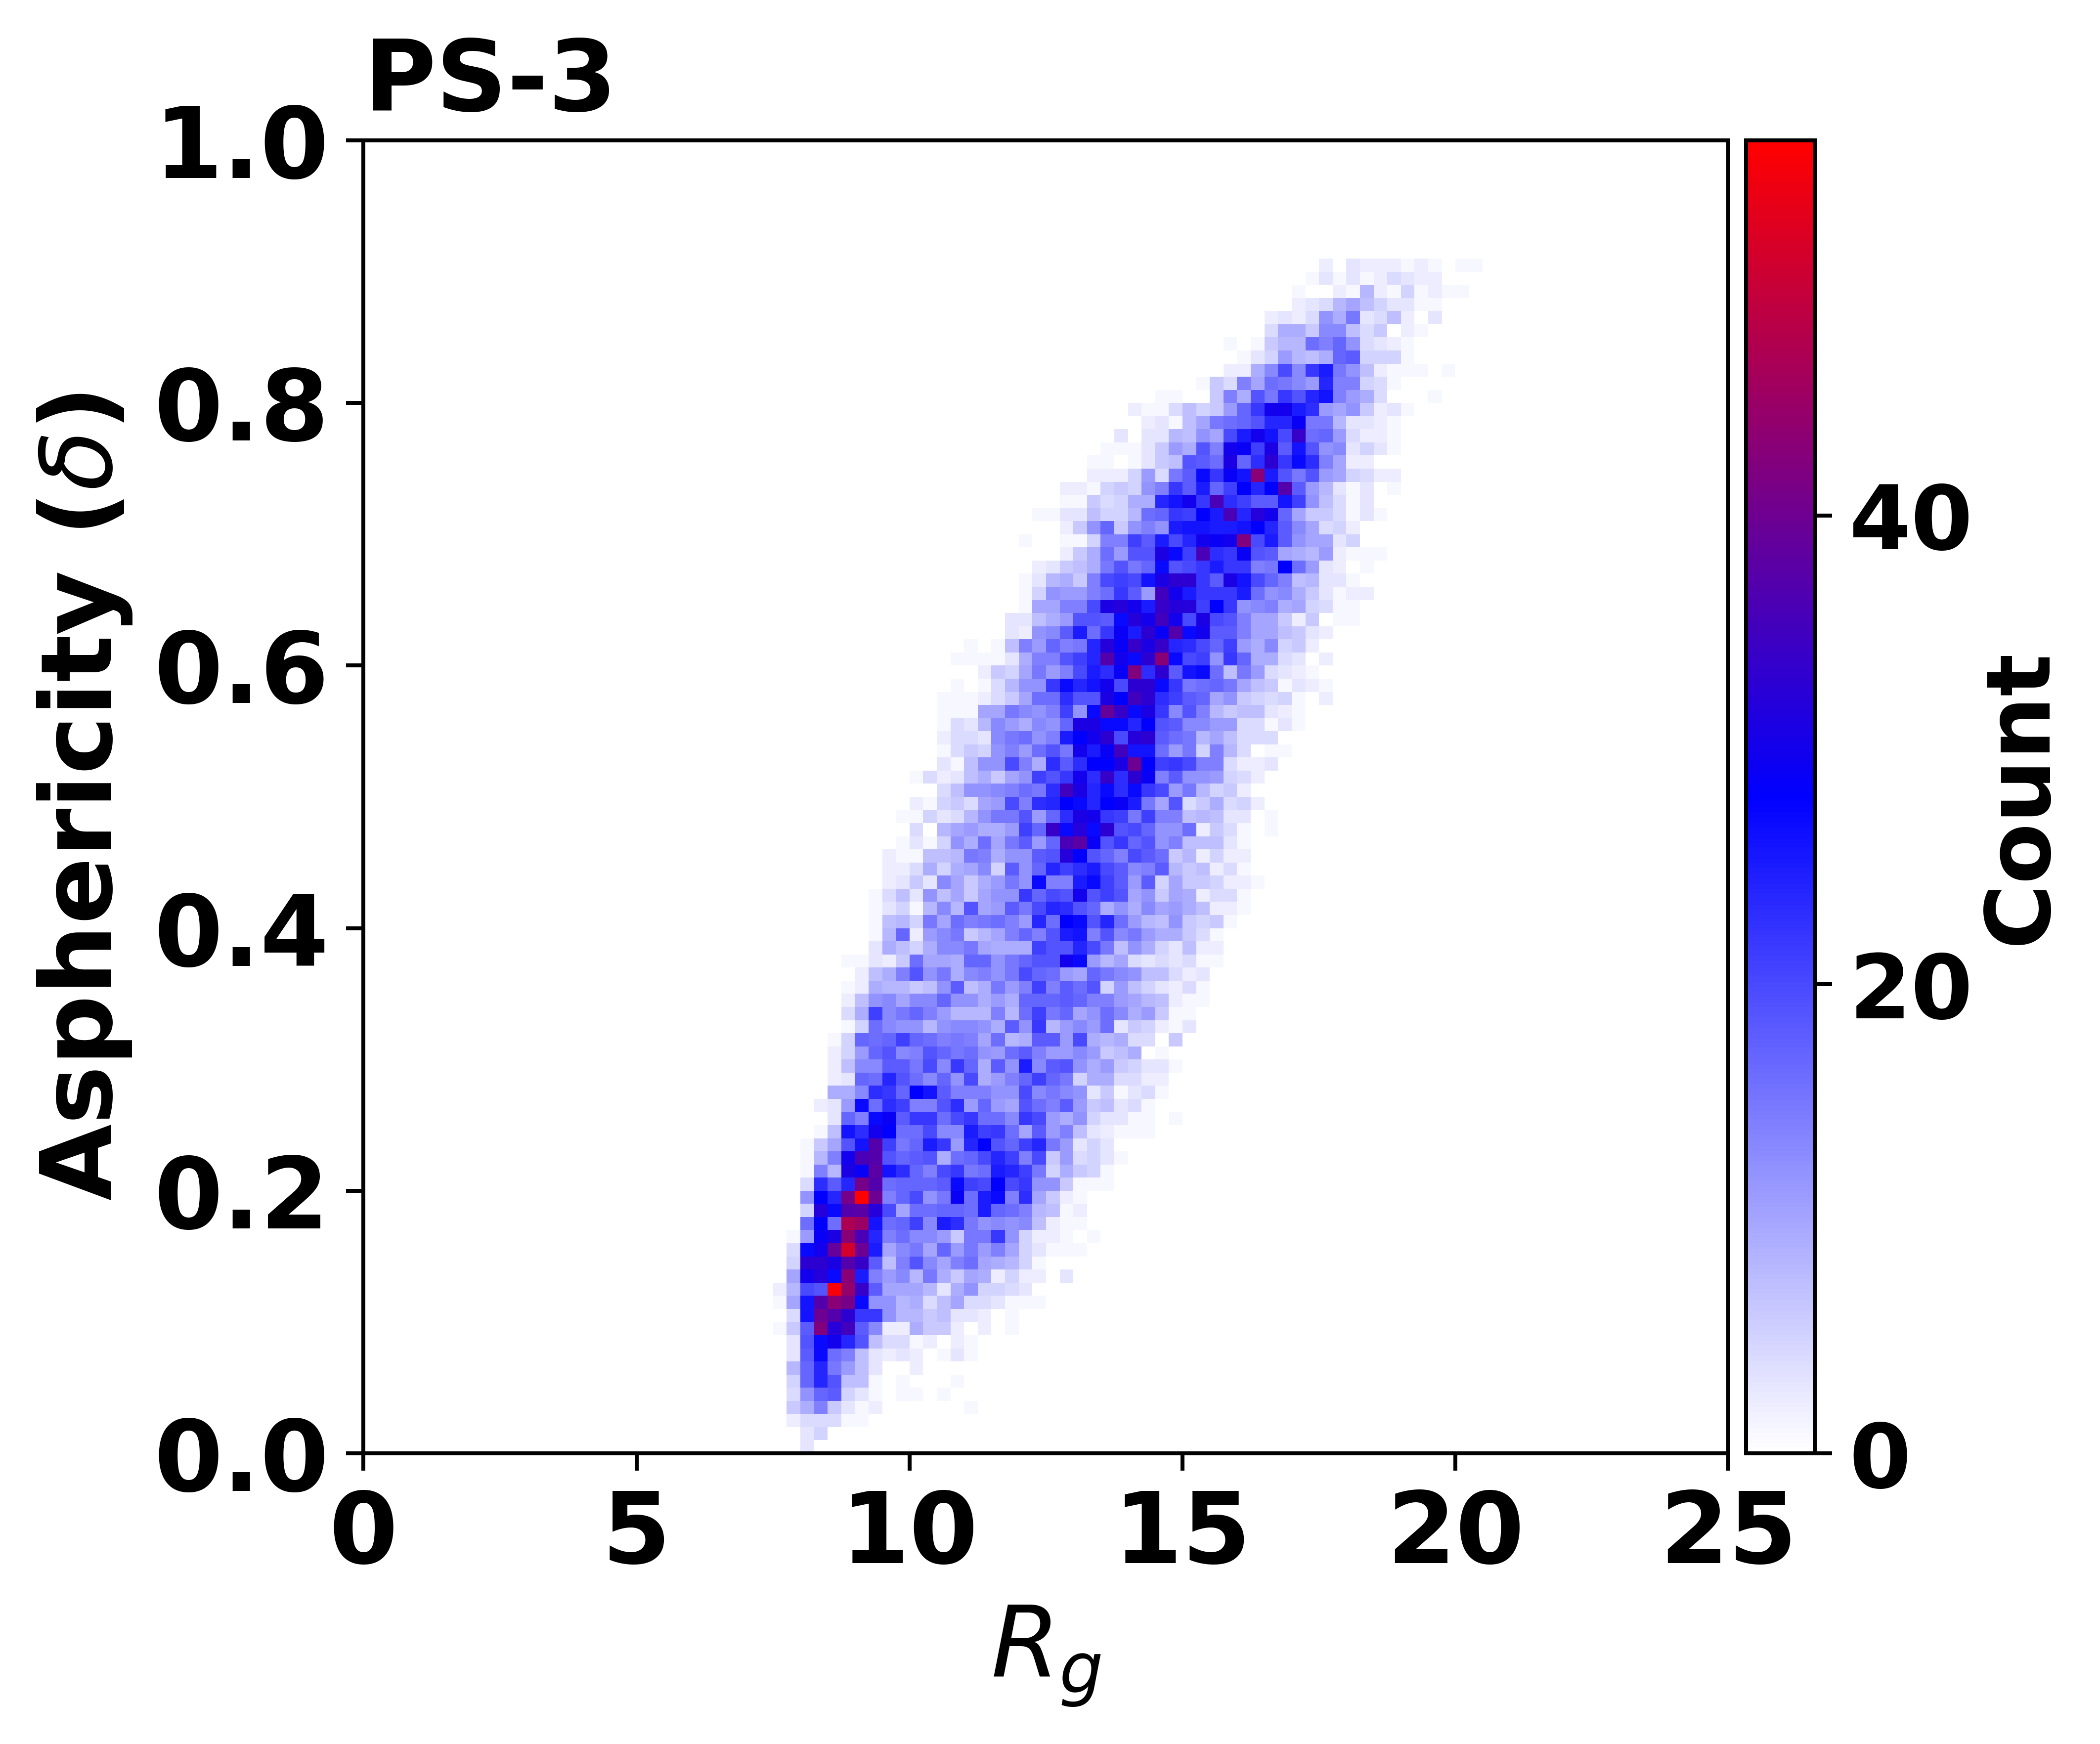

In [176]:
t='PS-3-AR.png'
plot_asphericity_vs_Rg(radius_of_gyration, asphericity,t, num_bins=100, max_Rg=25, max_asphericity=1.0)